![sslogo](https://github.com/stratascratch/stratascratch.github.io/raw/master/assets/sslogo.jpg)

# Visualizing data in pandas

- https://pandas.pydata.org/pandas-docs/stable/visualization.html
- https://matplotlib.org/
- https://matplotlib.org/tutorials/introductory/sample_plots.html
- https://seaborn.pydata.org/

## Data for this lesson

In [0]:
import pandas as pd
import numpy  as np
import psycopg2 as ps
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Connect to database
host_name = 'db-strata.stratascratch.com'
dbname = 'db_strata'
port = '5432'
# TODO Write your username and database password in the following two variables
user_name = '' #enter username
pwd = '' #enter your database password found in the profile tab in Strata Scratch

try:
    conn = ps.connect(host=host_name,database=dbname,user=user_name,password=pwd,port=port)
except ps.OperationalError as e:
    raise e
else:
    print('Connected!')

Connected!


In [0]:
def get_dataset(dataset_name):
    #Write SQL below to pull datasets 
    cur = conn.cursor()
    cur.execute(""" 
                SELECT *  FROM {0}; 
                """.format(dataset_name))
    data = cur.fetchall()
    colnames = [desc[0] for desc in cur.description] 
    conn.commit()

    #create the pandas dataframe
    dataframe = pd.DataFrame(data, columns=colnames)

    #close the connection
    cur.close()
    
    return dataframe

aapl_stock_price = get_dataset("aapl_historical_stock_price")

# Sort by date column
aapl_stock_price.sort_values(by="date", inplace=True)

In [0]:
aapl_stock_price.head()

,date,year,month,open,high,low,close,volume,id
3526,2000-01-03,2000,1,26.22,506.5,25.42,27.97,18648000,3555
3525,2000-01-04,2000,1,27.06,506.5,25.3,25.62,17883600,3554
3524,2000-01-05,2000,1,25.94,506.5,25,26,27353600,3553
3523,2000-01-06,2000,1,26.53,506.5,23.25,23.75,26947600,3552
3522,2000-01-07,2000,1,24.12,506.5,23.88,24.75,16133600,3551


## Introduction to plotting

Plotting is the process of converting numbers into nice looking images.

There are many kinds of plots but the most important thing to ponder over is the positional data it requires.
- Some plots like box plot and histogram require 1D data
- Other plots like line plot, scatter plot, geo plot require 2D data
- There are also density plots, contour plots, image plots and surface plots which require 3D positional data

Another thing to worry about is the aesthetics of the plot
- Color
- Size
- Font
- Orientation
- Et cetera

Luckily for use a lot of these things have sensible defaults or can be changed in one swoop using themes.

In this lesson we will learn about:
- Histograms
- Bar Charts
- Line plots and Timeseries plots
- Scatter plots

We will also learn about some important concepts which lie in the background:
- Color
- Color maps
- Figures
- Axis objects
- Legends
- Axis labels

## Introduction to matplotlib

Matplotlib is the de facto plotting library for python.

It can be rather hard and unwieldy to use at times but you can make literally everything with it.
Visit the [gallery](https://matplotlib.org/gallery/index.html) to see what can be done with it.

There are a lot of subtlities with it and plots may randomly break if you don't get all parameters right so don't get frustrated easily.

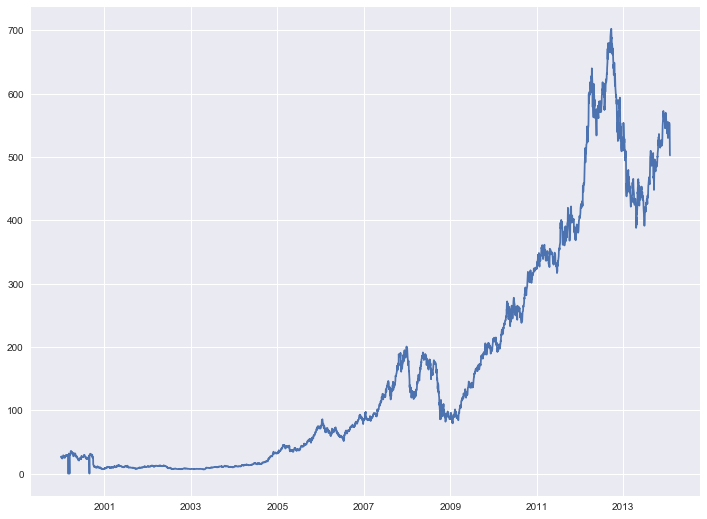

In [0]:
# plt is the imported matplotlib.pyplot module
fig = plt.figure(figsize=(12, 9))
ax  = fig.add_subplot(1, 1, 1)

ax.plot(aapl_stock_price.date, aapl_stock_price.open)

plt.show()

What you see here is a bare-bones plot of the opening stock price of AAPL starting from 2001 and ending in 2014. 

The `plt.figure()` call makes a figure. The figure is the top level container for your plots. In this example the figure has only a single subplot but it can have many subplots. Later in the lesson we will see that too.

The parameter `figsize` is a tuple (width, height) where both of them are measured as number_of_pixels / 100.
For example a width 9.6 is 960 pixels wide figure.

The line `ax = fig.add_subplot(1, 1, 1)` is the heart of any matplotlib plot. For now we ignore the paramaters and just say that this call returns an Axis object which we store in the `ax` variable.

Later we use the `ax.plot` method to do the actual drawing. The parameters used here are `x` positions and `y` positions provided as numpy arrays.

The last line `plt.show` is neccessary to get the plot drawn to screen after the code in Jupyter notebook or to a separate window if you use python outside of jupyter. It possible to save a figure as a file and avoid displaying it. Information on how to do it is [here](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.savefig).

This procedure is the basis for all our work but it is not the only way to plot with matplotlib.
There is a short and dirty solution to plotting where we use one global figure and one global axis.
To use that procedure we can call methods directly from plt. E.g. `plt.plot`, `plt.hist`, `plt.pie` and so on.
We recommend using the longer procedure described above for all cases unles you are 100% sure that the plotting code will never be used again.

### Labeling the axis and changing the color

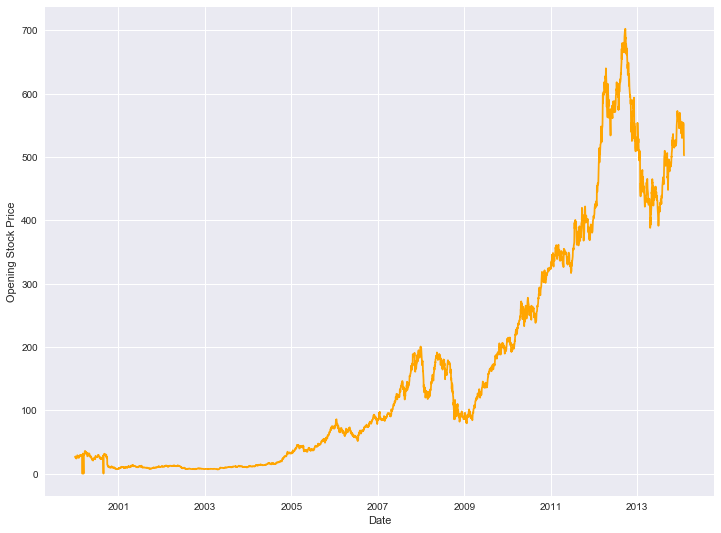

In [0]:
fig = plt.figure(figsize=(12, 9))
ax  = fig.add_subplot(1, 1, 1)

ax.plot(aapl_stock_price.date, aapl_stock_price.open, color='orange')

# Label the X axis
ax.set_xlabel("Date")

# Label the Y axis
ax.set_ylabel("Opening Stock Price")

plt.show()

We changed the colour of our curve using the color paramater of the plot method.

There are many ways to specify a color but unless you know what you are doing use simple named colors like red, green, blue, orange, violet and so on. 

If you need a lot of different named colors or just find the usual named colors boring try the xkcd color collection (e.g. color='xkcd:forest green').
- https://xkcd.com/color/rgb/


The following link shows all your options regarding color.
- https://matplotlib.org/api/colors_api.html

### Plotting the opening, closing and low prices on the same plot

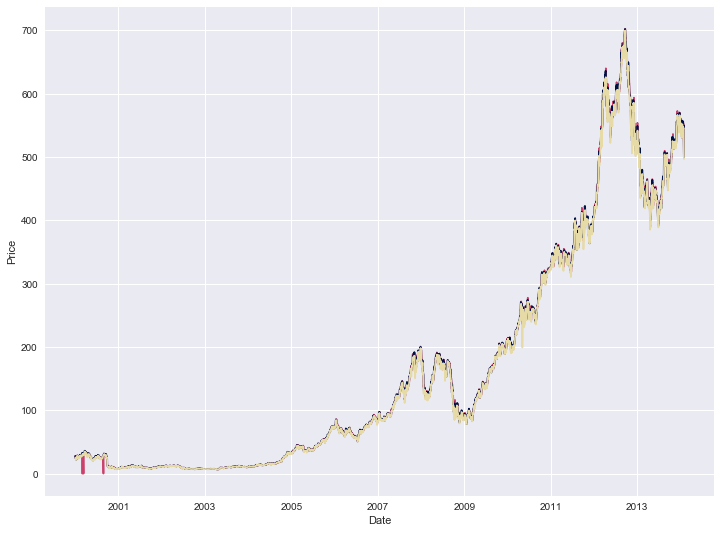

In [0]:
fig = plt.figure(figsize=(12, 9))
ax  = fig.add_subplot(1, 1, 1)

ax.set_xlabel("Date")
ax.set_ylabel("Price")

ax.plot(aapl_stock_price.date, aapl_stock_price.open, color='xkcd:dark pink')
ax.plot(aapl_stock_price.date, aapl_stock_price.close, color='xkcd:navy blue')
ax.plot(aapl_stock_price.date, aapl_stock_price.low, color='xkcd:beige')

plt.show()

To plot more than a single drawing on the same plot call the plot method multiple times in succession with different data and different colors. 

You can omit the color paramater and matplotlib will be smart enough to color different plots differently but we added colors here to demonstrate the xkcd coloring mechanism.

### Adding a legend to our plot

Our plot is great in all its beige on gray glory but we have no idea what each of these curves represents so we need to add a legend.

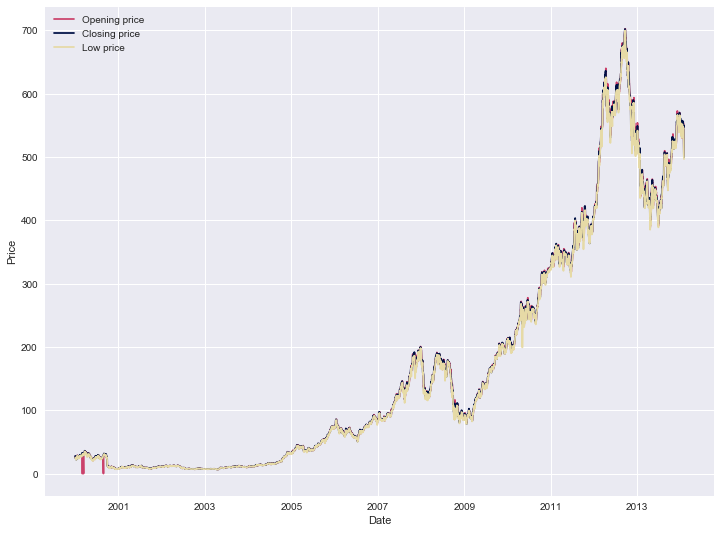

In [0]:
fig = plt.figure(figsize=(12, 9))
ax  = fig.add_subplot(1, 1, 1)

ax.set_xlabel("Date")
ax.set_ylabel("Price")

curve1, = ax.plot(aapl_stock_price.date, aapl_stock_price.open, color='xkcd:dark pink')
curve2, = ax.plot(aapl_stock_price.date, aapl_stock_price.close, color='xkcd:navy blue')
curve3, = ax.plot(aapl_stock_price.date, aapl_stock_price.low, color='xkcd:beige')

label1 = "Opening price"
label2 = "Closing price"
label3 = "Low price"

ax.legend([curve1, curve2, curve3], [label1, label2, label3])

plt.show()

To make a legend we call the `ax.legend` method which takes two paramaters:
- list of curves we drawn
- list of labels for each of these curves

Please note that ax.plot returns a tuple with 1 element and not just that element so we have to do:
- curve1, = ax.plot(aapl_stock_price.date, aapl_stock_price.open, color='xkcd:dark pink')

and not
- curve1 = ax.plot(aapl_stock_price.date, aapl_stock_price.open, color='xkcd:dark pink')

Documentation is available at:
- https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.legend.html#matplotlib.axes.Axes.legend

### Plotting the opening, closing and low prices on 3 different plots

The problem we have with our plots is that they are all kinda cuddled too close and it is hard to see which one is which.

To make more than a single we need the figure.

The method we glanced over earler `fig.add_subplot` is essential to this cause. It takes 3 paramaters.
- nrows which mean number of rows in the plot grid
- ncolumns which mean number of columns in the plot grid
- plot_id which is a number from 1 to nrows * ncolumns which tells matplot in which cell to plot

We also set the title of each plot because we not longer use a legend.

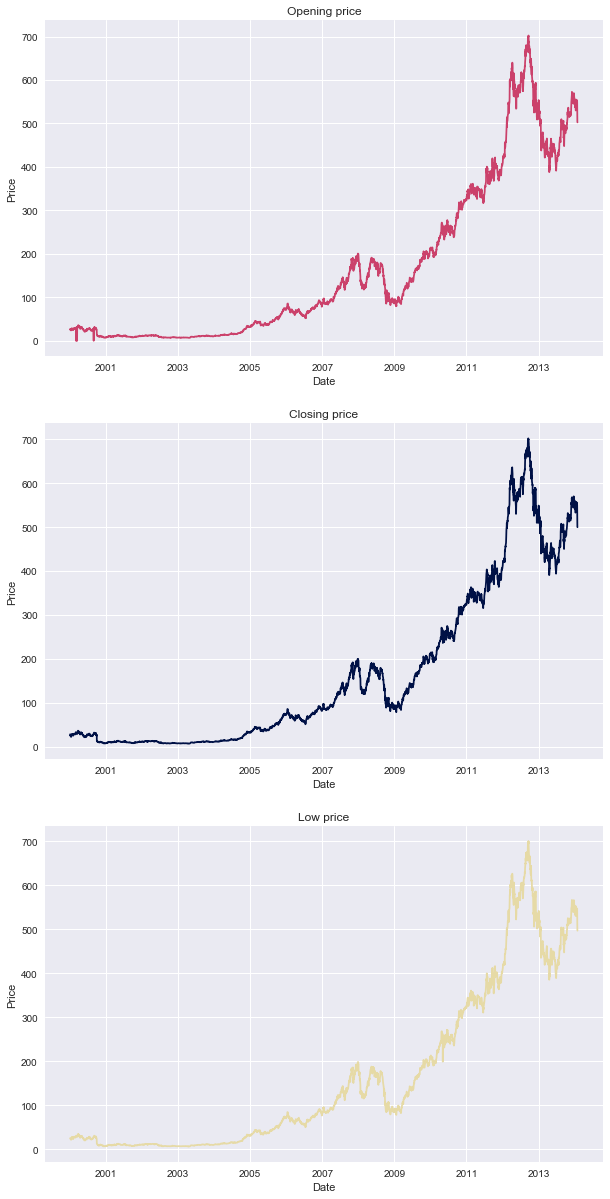

In [0]:
fig = plt.figure(figsize=(10, 21))

ax1 = fig.add_subplot(3, 1, 1) # 3 rows, 1 column, 1st plot
ax2 = fig.add_subplot(3, 1, 2) # 3 rows, 1 column, 2nd plot
ax3 = fig.add_subplot(3, 1, 3) # 3 rows, 1 column, 3rd plot

ax1.plot(aapl_stock_price.date, aapl_stock_price.open, color='xkcd:dark pink')
ax2.plot(aapl_stock_price.date, aapl_stock_price.close, color='xkcd:navy blue')
ax3.plot(aapl_stock_price.date, aapl_stock_price.low, color='xkcd:beige')

ax1.set_title("Opening price")
ax2.set_title("Closing price")
ax3.set_title("Low price")

# Loop over all plots and give them all same label for X and Y axis
for ax in [ax1, ax2, ax3]:
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    
plt.show()

### Scatter plots, color maps, controlling size to make bubble plots and markers

#### Scatter plots

This type of plots draw a filled circle for every pair of input (x, y) coordinates.

- https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter

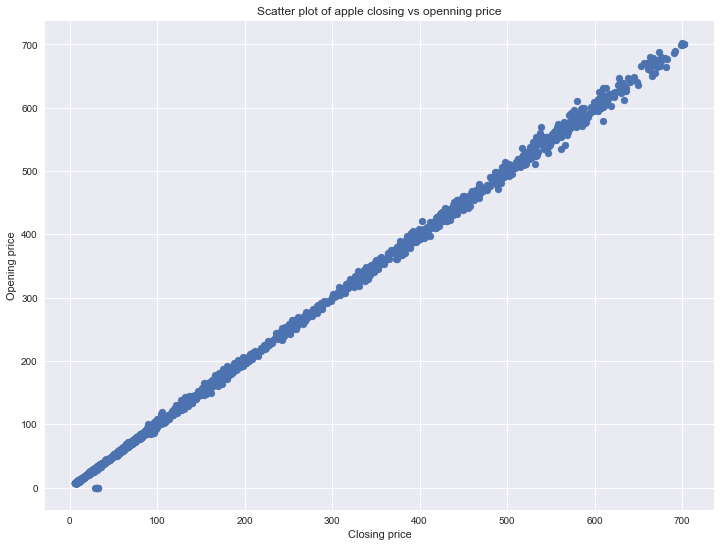

In [0]:
fig = plt.figure(figsize=(12, 9))
ax  = fig.add_subplot(1, 1, 1)

ax.scatter(aapl_stock_price.close, aapl_stock_price.open)

ax.set_xlabel("Closing price")
ax.set_ylabel("Opening price")

ax.set_title("Scatter plot of apple closing vs openning price")

plt.show()

#### Color maps and color coding the scatter dots

We will use the viridis color palette and the full list can be found at link below:
- https://matplotlib.org/examples/color/colormaps_reference.html

The syntax is always `cmap = plt.get_cmap(name_of_colormap)`

That was the easy part where you just pick what looks nicest to your eye.

The tricky part is the parameter named `c` which is short for color but is not the same as the parameter named `color` in line plots.

The parameter `c` takes a numpy array and colors each dot depending on the correspoding value defined in the array we passed to it. In this example we use the year column of our dataset which ranges from 2003 to 2014. Lower years will give darker bluer dots while later years will give ligher greener dots. This color gradation exists for all colormaps so try some others to see the effects.

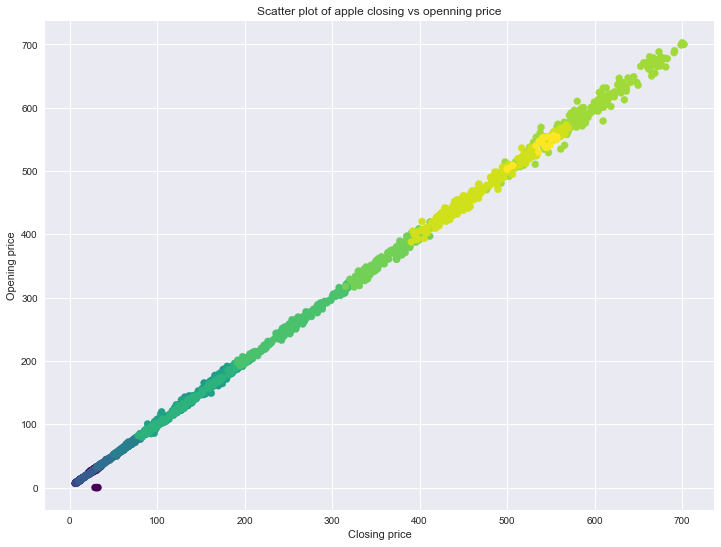

In [0]:
fig = plt.figure(figsize=(12, 9))
ax  = fig.add_subplot(1, 1, 1)

ax.scatter(aapl_stock_price.close, aapl_stock_price.open, 
           c=aapl_stock_price.year, 
           cmap=plt.get_cmap("viridis"))

ax.set_xlabel("Closing price")
ax.set_ylabel("Opening price")

ax.set_title("Scatter plot of apple closing vs openning price")

plt.show()

#### Bubble plots

The idea from coloring and the `c` parameter continues here except now we have an `s` paramater short for size.

We pass a numpy array where each element defines the bubble size for the bubble.

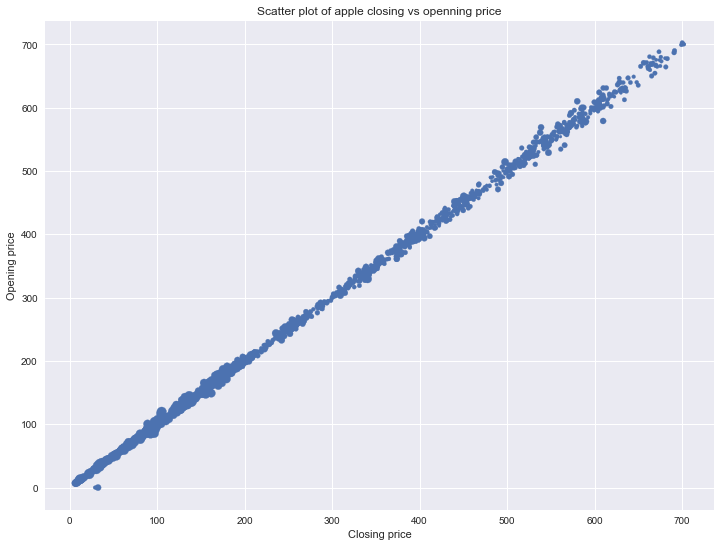

In [0]:
fig = plt.figure(figsize=(12, 9))
ax  = fig.add_subplot(1, 1, 1)

ax.scatter(aapl_stock_price.close, aapl_stock_price.open, 
           s = aapl_stock_price.volume.astype(np.float32) * 0.000001)

ax.set_xlabel("Closing price")
ax.set_ylabel("Opening price")

ax.set_title("Scatter plot of apple closing vs openning price")

plt.show()

#### Markers

They define the visual representation of the dot.
The defaut marker is 'o' which is the dot but there are other possible markers (e.g. 'x', '`*`')

The list of all markers is available at:
- https://matplotlib.org/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle.markers

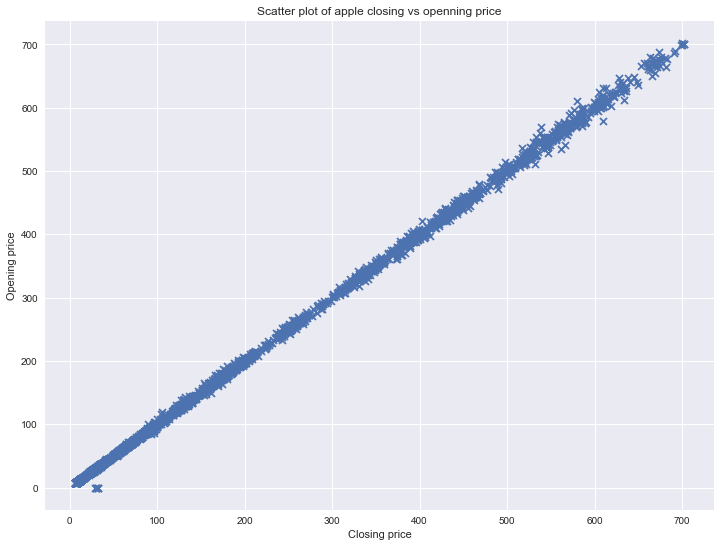

In [0]:
fig = plt.figure(figsize=(12, 9))
ax  = fig.add_subplot(1, 1, 1)

ax.scatter(aapl_stock_price.close, aapl_stock_price.open, 
           marker='x')

ax.set_xlabel("Closing price")
ax.set_ylabel("Opening price")

ax.set_title("Scatter plot of apple closing vs openning price")

plt.show()

### Histograms and Barcharts

Histograms visually show the distribution of data.

- https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hist.html#matplotlib.axes.Axes.hist

To make histograms we use the `Axis.hist` method. There primary arguments are:
- x which is the data to plot
- bins which is the number of bins to discretize the data in
- range which is a tuple which specifies where to cutoff the data, default is (x.min(), x.max())
- density is a boolean toggle which decides if the y axis values will be frequences or probabilities
- cumulative is a boolean toggle which decides if we plot the probability mass/density function or the cumulative mass/desnity function.

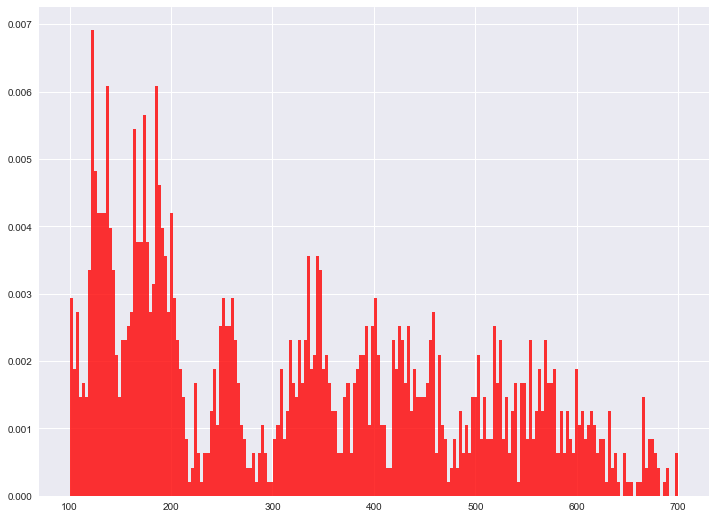

In [0]:
fig = plt.figure(figsize=(12, 9))
ax  = fig.add_subplot(1, 1, 1)

ax.hist(aapl_stock_price.open.astype(np.float32),
        bins=200, range=(100, 700), density=True,
        color='red', # color is available here as well
        alpha=0.8) # alpha controls the transparency

plt.show()

Barcharts display relations between multiple data sources.

- https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.bar.html#matplotlib.axes.Axes.bar

The main parameters are:
- x is a list or numpy array for x-axis
- height is either a scalar or a list of heights for all bars
- width is either a scalar or a list of widths for all bars
- tick_label is a list of labels for each bar
- color is a list of colors for each bar

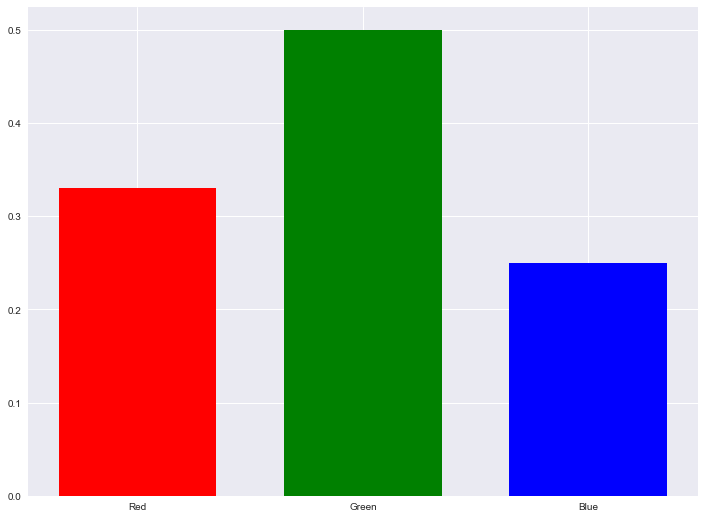

In [0]:
fig = plt.figure(figsize=(12, 9))
ax  = fig.add_subplot(1, 1, 1)

ax.bar(x=[1, 2, 3], 
       height=[0.33, 0.5, 0.25],
       color=['red', 'green', 'blue'],
       tick_label=["Red", "Green", "Blue"],
       width=0.7)

plt.show()

There are many more plot types depending on what you want to so please see the following link for a full guide to types of plots.

- https://matplotlib.org/api/axes_api.html

## Introduction to Seaborn

- https://seaborn.pydata.org/introduction.html

The first good thing seaborn brings to the table is support for [styling](https://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial) your plots.

To change styles we use `sns.set_style(stylename)` with stylename being one of darkgrid, whitegrid, dark, white, ticks.

For example `sns.set_style("whitegrid")` and notice the white background now.

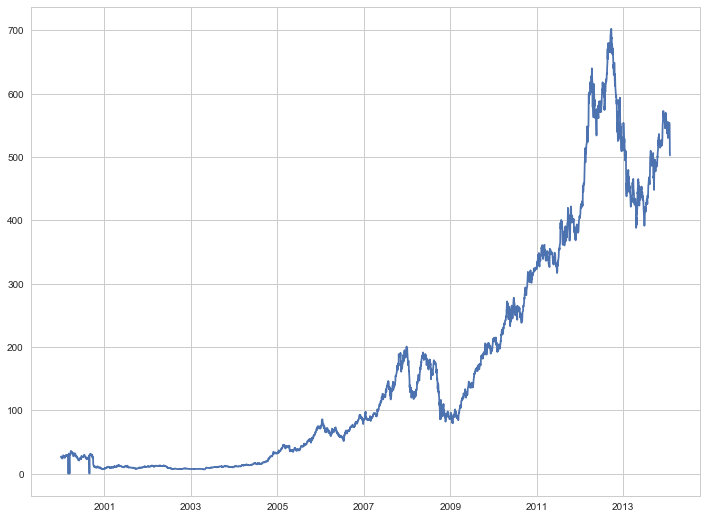

In [0]:
sns.set_style("whitegrid")

fig = plt.figure(figsize=(12, 9))
ax  = fig.add_subplot(1, 1, 1)

ax.plot(aapl_stock_price.date, aapl_stock_price.open)

plt.show()

#### Plotting distributions using `sns.distplot`.

- https://seaborn.pydata.org/examples/distplot_options.html#distplot-options

Because seaborn is built upon matplotlib it uses a lot of the same mechanisms including axes and figures.

Each plotting method in seaborn has a parameter called `ax` so seaborn know where to plot.

The `distplot` method has a handy paramete called `kde` which is short for Kernel Density Estimation and which controls whether the probability density estimation line should be draw.

/home/aleksandar/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


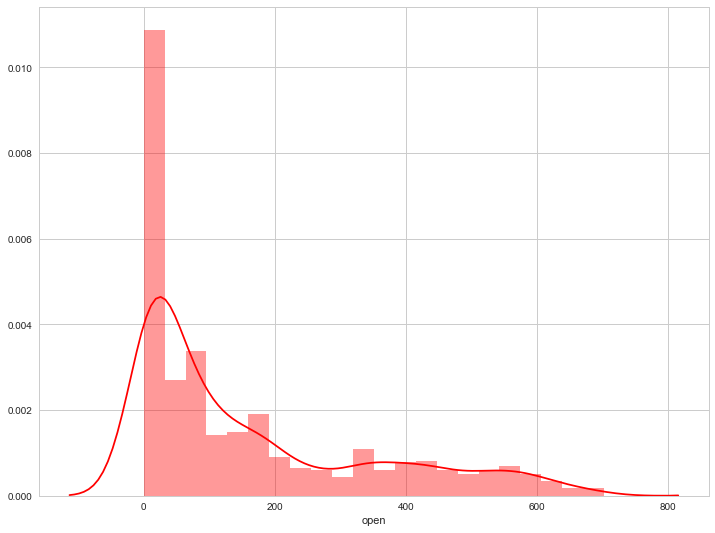

In [0]:
fig = plt.figure(figsize=(12, 9))
ax  = fig.add_subplot(1, 1, 1)

sns.distplot(aapl_stock_price.open.astype(np.float32), kde=True, color='red', ax=ax)

plt.show()

### Using pandas built-in plotting mechanisms

- https://pandas.pydata.org/pandas-docs/stable/visualization.html

Each dataframe has a plot field which also acts as a method.
That method has 4 important paramaters.
- x which is column name for x axis
- y which is column name for x axis
- kind which is the type of plot we want
- ax which is our axis to draw with

If we treat it as a field we can call plotting methods like `df.plot.hist` or `df.plot.scatter`

## Exercises

#### Exercise #1 

Estimate a line going through the open price curve and plot it where the x axis is the range 2000 to 2014. Any estimate is ok.

Hint: Use np.linspace and np.apply_along_axis

#### Exercise #2 

Plot the value column as a histogram using seaborn.

If you get errors about floats and Decimals convert the volume column to be of type np.float32 using 

```
    aapl_stock_price.volume.astype(np.float32)
```

#### Exercise #3

Make the open, close, low plot using 3 columns instead of 3 rows.

#### Exercise #4 

Make a triangle using scatter plot.

Hint: Use np.linspace and np.hstack

#### Exercise #5 

Make a grid of 4 x 3 plots where each plot shows the difference between the opening and closing price for the corresponding month over all years.